<a href="https://colab.research.google.com/github/Renatolopo/Inteligencia-Computacional/blob/main/IIC_Lista_de_Exerc%C3%ADcios_de_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios de Aprendizado Supervisionado
**Aluno: Renato Lopo**

1. Problemas de Classificação


Dados os seguintes bancos de dados:
- Titanic ( 3 atributos descritivos, 2 Classes )
- Iris (4 atributos descritivos, 3 classes)
- Digits (X atributos descritivos, 10 classes)


Dados os seguintes métodos de classificação: kNN, Naïve Bayes, Regressão Logística, Redes Neurais (MLP), SVM, Árvores de Decisão e Random Forests


Pede-se:
a) Localize a documentação de cada método na biblioteca Scikit-Learn, e descreva os principais parâmetros de cada método;
b) Treine modelos de cada algoritmo para cada banco de dados usando Validação Cruzada e mostre os melhores parâmetros encontrados de cada modelo
c) Mostre a Matriz de Confusão, Acurácia, Sensibilidade e  F1-Score de cada modelo para cada banco de dados





2. Problemas de Regressão


Dados os seguintes bancos de dados
- Expectativa de Vida segundo a Organização Mundial de Saúde (https://www.kaggle.com/kumarajarshi/life-expectancy-who) ATENÇÃO: selecione apenas os registros referentes ao Brasil

Dados os seguintes métodos de regressão: kNN,  GLM, Redes Neurais (MLP), SVM, Árvores de Regressão e Gradient Boosting

Pede-se:
a) Localize a documentação de cada método na biblioteca Scikit-Learn, e descreva os principais parâmetros de cada método;
b) Treine modelos de cada algoritmo para cada banco de dados usando Validação Cruzada e mostre os melhores parâmetros encontrados de cada  modelo
c) Mostre a Raiz do Erro Quadrático Médio (RMSE) e o Erro Percentual Absoluto Médio (MAPE) de cada modelo para cada banco de dados

# Parte 1 - Problemas de Classificação

## 1 Importação das Bases e Pre-processamento

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('https://query.data.world/s/c2ixg24yogu6pgudqodbhn5ynrvdjr')
titanic.head()

,Nome,Classe,Idade,Sexo,Sobreviveu
0,"Allen, Miss Elisabeth Walton",1.0,29.00,F,1
1,"Allison, Miss Helen Loraine",1.0,2.00,F,0
2,"Allison, Mr Hudson Joshua Creighton",1.0,30.00,M,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1.0,25.00,F,0
4,"Allison, Master Hudson Trevor",1.0,0.92,M,1


In [ ]:
titanic = titanic.drop(columns=['Nome'])

In [ ]:
titanic = pd.get_dummies(titanic, columns=['Sexo'])

In [ ]:
titanic = titanic.dropna()

In [ ]:
titanic

,Classe,Idade,Sobreviveu,Sexo_F,Sexo_M
0,1.0,29.00,1,1,0
1,1.0,2.00,0,1,0
2,1.0,30.00,0,0,1
3,1.0,25.00,0,1,0
4,1.0,0.92,1,0,1
...,...,...,...,...,...
1308,3.0,27.00,0,0,1
1309,3.0,26.00,0,0,1
1310,3.0,22.00,0,0,1
1311,3.0,24.00,0,0,1


In [ ]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      names=["sepal_length","sepal_width", "petal_length", "petal_width", "class"])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
def get_class(val):
  if val == 'Iris-setosa':
    return 1
  elif val == 'Iris-versicolor':
    return 2
  else:
    return 3

# converte a coluna class para numeros
iris['class'] = iris['class'].apply(get_class)

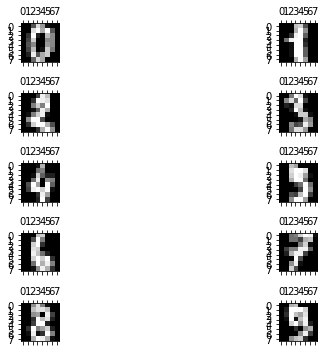

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

_, ax = plt.subplots(5, 2, figsize=(10,5))

plt.gray() 
for i in range(0,5):
  for j in range(0,2):
    ax[i][j].matshow(digits.images[j  + i*2 ]) 
plt.tight_layout()

## Modelos

## 2 KNN
**n_neighbors:** Número de vizinhos a serem usados por padrão é usado 5.

**weights:** Função de peso usada na previsão. Valores possíveis:
* 'uniform':  pesos uniformes. Todos os pontos em cada vizinhança são ponderados igualmente.
* 'distance': pontos de peso pelo inverso de sua distância. neste caso, os vizinhos mais próximos de um ponto de consulta terão uma influência maior do que os vizinhos mais distantes.
* 'callable': uma função definida pelo usuário que aceita uma matriz de distâncias e retorna uma matriz da mesma forma contendo os pesos.

**algorithm:** {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
Algoritmo usado para calcular os vizinhos mais próximos:

* 'ball_tree' usaráBallTree

* 'kd_tree' usaráKDTree

* 'brute' usará uma pesquisa de força bruta.

* 'auto' tentará decidir o algoritmo mais apropriado com base nos valores passados ​​para o fitmétodo.

Nota: o ajuste na entrada esparsa substituirá a configuração deste parâmetro, usando força bruta.

**leaf_size:** int, padrão=30
Tamanho da folha passado para BallTree ou KDTree. Isso pode afetar a velocidade da construção e da consulta, bem como a memória necessária para armazenar a árvore. O valor ótimo depende da natureza do problema.

**p:** int, padrão=2
Parâmetro de potência para a métrica Minkowski. Quando p = 1, isso é equivalente a usar distância_manhattan (l1) e distância_euclidiana (l2) para p = 2. Para p arbitrário, é usado distância_minkowski (l_p).

**str métrica:** ou callable, default='minkowski'
A métrica de distância a ser usada para a árvore. A métrica padrão é minkowski, e com p=2 é equivalente à métrica euclidiana padrão. Para obter uma lista de métricas disponíveis, consulte a documentação do DistanceMetric. Se a métrica for “pré-calculada”, assume-se que X é uma matriz de distância e deve ser quadrada durante o ajuste. X pode ser um grafo esparso , caso em que apenas elementos “diferentes de zero” podem ser considerados vizinhos.

**metric_params:** dict, default=Nenhum
Argumentos de palavra-chave adicionais para a função de métrica.

**n_jobs:** int, default=Nenhum
O número de trabalhos paralelos a serem executados para pesquisa de vizinhos. Nonesignifica 1 a menos que em um joblib.parallel_backendcontexto. -1significa usar todos os processadores. Consulte o Glossário para obter mais detalhes. Não afeta o fitmétodo.


In [ ]:
from sklearn.model_selection import train_test_split 
def get_xy_titanic():
  y = titanic['Sobreviveu']
  X = titanic.drop(columns=['Sobreviveu'])
  return train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)

def get_xy_iris():
  y = iris['class']
  X = iris.drop(columns=['class'])
  return train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)

def get_xy_digits(): 
  y = digits.target
  X = digits.data
  return train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)

### 2.1 KNN titanic

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.625     , 0.77483444, 0.81456954, 0.73509934, 0.62913907])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
resultado = knn.predict(X_test)
resultado

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        81   8   89
1        16  47   63
All      97  55  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        89
           1       0.85      0.75      0.80        63

    accuracy                           0.84       152
   macro avg       0.84      0.83      0.83       152
weighted avg       0.84      0.84      0.84       152



### 2.2 KNN Iris

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
knn.fit(X_train,y_train)
resultado = knn.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 3])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3  All
Real                    
1        10   0   0   10
2         0   9   1   10
3         0   1   9   10
All      10  10  10   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10
           3       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 2.3 KNN Digits

In [ ]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
knn.fit(X_train,y_train)
resultado = knn.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 8, 6, 7, 2, 4, 9, 2, 0, 9, 1, 1, 5, 2, 7,
       9, 8, 4, 3, 5, 0, 6, 4, 7, 9, 6, 3, 2, 2, 4, 3, 1, 3, 9, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 1, 6, 9, 7, 4, 1, 9, 2, 3, 7, 9, 9, 6, 4, 7, 7,
       3, 3, 4, 1, 9, 6, 6, 3, 0, 8, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 8, 6, 2, 0, 6, 6, 2, 0, 5, 2, 4, 2, 7, 0, 1, 8, 2, 7, 3, 2,
       3, 5, 1, 1, 9, 3, 3, 7, 6, 8, 4, 3, 2, 0, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 8, 7, 8, 9, 9, 0, 8, 1, 1, 5, 7, 7, 9, 5, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 9, 4, 2, 6, 0, 3, 4, 2, 1, 1, 0, 4, 7, 0, 3, 7, 3, 9,
       4, 4, 4, 5, 5, 4, 5, 9, 9, 7, 4, 8, 4, 9, 0, 4, 9, 1, 0, 3, 3, 3,
       9, 9, 4, 2, 5, 6, 1, 4, 1, 7, 8, 3, 2, 4, 7, 1, 7, 1, 3, 3, 6, 3,
       5, 7, 6, 8, 1, 3, 7, 1, 3, 4, 1, 5, 5, 0, 1, 9, 9, 2, 5, 1, 7, 0,
       2, 4, 8, 8, 0, 8, 7, 5, 6, 5, 5, 5, 5, 0, 2, 8, 1, 2, 7, 0, 6, 3,
       1, 4, 6, 2, 9, 5, 1, 2, 0, 9, 7, 0, 9, 1, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 8, 6, 0, 8, 4, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  37   0   0   0   0   0   0   0   0   37
2         0   0  35   0   0   0   0   0   0   0   35
3         0   0   0  36   0   0   0   1   0   0   37
4         0   0   0   0  36   0   0   0   0   0   36
5         0   0   0   0   0  35   0   0   0   1   36
6         0   0   0   0   0   0  36   0   0   0   36
7         0   0   0   0   0   0   0  36   0   0   36
8         0   2   0   0   0   0   0   0  33   0   35
9         0   0   0   0   0   0   0   0   1  35   36
All      36  39  35  36  36  35  36  37  34  36  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.97      0.94      0.96        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## 3 Naïve Bayes
Os métodos Naive Bayes são um conjunto de algoritmos de aprendizado supervisionado baseados na aplicação do teorema de Bayes com a suposição “ingênua” de independência condicional entre cada par de características dado o valor da variável de classe.
### Parâmetros
**alfa:** flutuante, padrão = 1,0
Parâmetro de suavização aditiva (Laplace/Lidstone) (0 para sem suavização).

**fit_prior:** bool, default=True
Quer aprender probabilidades anteriores de classe ou não. Se falso, será usado um anterior uniforme.

**class_prior:** tipo array de forma (n_classes,), default=Nenhum
Probabilidades prévias das classes. Se especificado, os antecedentes não são ajustados de acordo com os dados.

### 3.1 Naive Bayes com titanic

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
scores = cross_val_score(gnb, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.42763158, 0.81456954, 0.79470199, 0.79470199, 0.65562914])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
gnb.fit(X_train,y_train)
resultado = gnb.predict(X_test)
resultado

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        78  11   89
1        13  50   63
All      91  61  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        89
           1       0.82      0.79      0.81        63

    accuracy                           0.84       152
   macro avg       0.84      0.84      0.84       152
weighted avg       0.84      0.84      0.84       152



### 3.2 Naive Bayes com Iris

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
scores = cross_val_score(gnb, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
gnb.fit(X_train,y_train)
resultado = gnb.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 3])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3  All
Real                    
1        10   0   0   10
2         0   9   1   10
3         0   1   9   10
All      10  10  10   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10
           3       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 3.3 Naive bayes com digits

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
scores = cross_val_score(gnb, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
gnb.fit(X_train,y_train)
resultado = gnb.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 1, 6, 7, 2, 4, 9, 8, 0, 3, 1, 8, 5, 8, 7,
       7, 8, 7, 8, 5, 0, 6, 4, 7, 9, 6, 8, 8, 2, 4, 3, 1, 3, 1, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 8, 6, 8, 7, 4, 1, 9, 2, 3, 7, 3, 9, 6, 8, 7, 7,
       6, 3, 4, 1, 9, 6, 6, 3, 0, 8, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 3, 6, 2, 0, 6, 6, 2, 0, 5, 2, 4, 2, 7, 0, 7, 8, 2, 7, 3, 2,
       3, 5, 1, 1, 9, 3, 5, 7, 6, 8, 4, 3, 2, 0, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 8, 7, 8, 9, 9, 0, 8, 1, 1, 5, 7, 7, 8, 5, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 9, 4, 2, 6, 0, 3, 4, 2, 1, 1, 0, 7, 7, 0, 3, 7, 8, 9,
       4, 4, 4, 7, 5, 4, 5, 9, 9, 7, 4, 1, 4, 9, 0, 7, 9, 1, 0, 3, 3, 3,
       9, 9, 4, 8, 5, 6, 2, 4, 8, 7, 8, 3, 2, 4, 7, 1, 7, 1, 1, 3, 6, 8,
       5, 5, 5, 8, 8, 3, 7, 1, 3, 4, 1, 5, 5, 0, 7, 9, 9, 8, 5, 1, 7, 0,
       8, 4, 8, 8, 0, 8, 7, 5, 6, 5, 5, 5, 5, 0, 8, 8, 8, 2, 7, 0, 6, 3,
       7, 4, 6, 2, 9, 5, 1, 2, 0, 9, 7, 0, 3, 1, 0, 0, 3, 8, 1, 6, 4, 4,
       7, 8, 5, 6, 8, 6, 0, 8, 4, 4, 8, 3, 2, 9, 5,

In [ ]:
# matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  28   1   0   0   0   0   3   5   0   37
2         0   1  23   0   0   0   0   0  11   0   35
3         0   1   0  29   0   1   1   1   4   0   37
4         0   0   0   0  31   0   0   4   1   0   36
5         0   0   0   1   0  34   0   1   0   0   36
6         0   0   0   0   0   1  35   0   0   0   36
7         0   0   0   0   0   1   0  34   1   0   36
8         0   3   0   1   0   0   0   1  30   0   35
9         0   2   0   2   0   0   0   1   3  28   36
All      36  35  24  33  31  37  36  45  55  28  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.80      0.76      0.78        37
           2       0.96      0.66      0.78        35
           3       0.88      0.78      0.83        37
           4       1.00      0.86      0.93        36
           5       0.92      0.94      0.93        36
           6       0.97      0.97      0.97        36
           7       0.76      0.94      0.84        36
           8       0.55      0.86      0.67        35
           9       1.00      0.78      0.88        36

    accuracy                           0.86       360
   macro avg       0.88      0.86      0.86       360
weighted avg       0.88      0.86      0.86       360



 ## 4 Regressão Logística

 Classificador de regressão logística (também conhecido como logit, MaxEnt).

 ### Parâmetros 
 **penalidade:** {'l1', 'l2', 'elasticnet', 'none'}, default='l2'
Especifique a norma da pena:

* 'none': nenhuma penalidade é adicionada;

* 'l2': adiciona um termo de penalidade L2 e é a escolha padrão;

* 'l1': adicionar um termo de penalidade L1;

* 'elasticnet': ambos os termos de penalidade L1 e L2 são adicionados.

**dual:** bool, default=False
Formulação dupla ou primal. A formulação dupla é implementada apenas para a penalidade l2 com o solucionador liblinear. Prefira dual=False quando n_samples > n_features.

**tol:** float, default=1e-4
Tolerância para critérios de parada.

**C:** flutuante, padrão = 1,0
Inverso da força de regularização; deve ser um float positivo. Como nas máquinas de vetor de suporte, valores menores especificam uma regularização mais forte.

**fit_intercept:** bool, default=True
Especifica se uma constante (também conhecida como polarização ou interceptação) deve ser adicionada à função de decisão.
 
**random_state:** int, instância RandomState, default=None
Usado quando solver== 'sag', 'saga' ou 'liblinear' para embaralhar os dados. Consulte o Glossário para obter detalhes.

### 4.1 Regressão Logística com titanic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.49342105, 0.84768212, 0.83443709, 0.79470199, 0.62251656])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        77  12   89
1        14  49   63
All      91  61  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        89
           1       0.80      0.78      0.79        63

    accuracy                           0.83       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.83      0.83      0.83       152



### 4.2 Regressão Logística com Iris

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(clf, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 3, 3])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1  2   3  All
Real                   
1        10  0   0   10
2         0  9   1   10
3         0  0  10   10
All      10  9  11   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 4.3 Regressão Logística com Digits

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0, max_iter=5000)
scores = cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.925     , 0.87777778, 0.93871866, 0.93314763, 0.89693593])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 8, 6, 7, 2, 4, 9, 2, 0, 9, 1, 1, 5, 2, 7,
       9, 8, 4, 3, 5, 0, 6, 4, 7, 9, 6, 3, 2, 2, 4, 3, 1, 3, 9, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 1, 6, 9, 7, 4, 1, 9, 2, 3, 7, 9, 9, 6, 4, 7, 7,
       5, 3, 4, 1, 9, 6, 6, 3, 0, 8, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 8, 6, 2, 0, 6, 6, 2, 0, 5, 2, 4, 2, 7, 0, 1, 8, 2, 7, 3, 2,
       3, 5, 3, 1, 9, 3, 8, 7, 6, 8, 4, 3, 2, 0, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 8, 7, 9, 9, 9, 0, 8, 1, 1, 5, 7, 7, 9, 5, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 9, 4, 2, 6, 0, 3, 4, 2, 1, 1, 0, 4, 7, 0, 3, 7, 3, 9,
       4, 4, 4, 5, 5, 4, 5, 9, 9, 7, 4, 1, 4, 9, 0, 4, 9, 1, 0, 5, 3, 9,
       9, 9, 4, 2, 5, 6, 2, 4, 8, 3, 8, 3, 2, 4, 7, 1, 7, 1, 3, 3, 6, 3,
       5, 7, 6, 8, 1, 3, 7, 1, 3, 4, 1, 5, 5, 0, 1, 9, 9, 2, 5, 1, 7, 0,
       2, 4, 8, 8, 0, 8, 7, 5, 6, 5, 5, 5, 5, 0, 2, 8, 8, 2, 7, 0, 6, 3,
       1, 4, 6, 2, 9, 5, 1, 2, 0, 9, 7, 0, 9, 1, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 8, 6, 0, 8, 4, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  35   1   0   0   0   0   0   1   0   37
2         0   0  35   0   0   0   0   0   0   0   35
3         0   0   0  33   0   2   0   0   1   1   37
4         0   0   0   0  36   0   0   0   0   0   36
5         0   0   0   0   0  35   0   0   0   1   36
6         0   0   0   0   0   0  36   0   0   0   36
7         0   0   0   1   0   0   0  35   0   0   36
8         0   2   0   0   0   0   0   0  33   0   35
9         0   0   0   0   0   0   0   0   0  36   36
All      36  37  36  34  36  37  36  35  35  38  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.95      0.95        37
           2       0.97      1.00      0.99        35
           3       0.97      0.89      0.93        37
           4       1.00      1.00      1.00        36
           5       0.95      0.97      0.96        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       0.94      0.94      0.94        35
           9       0.95      1.00      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## 5 Redes Neurais (MLP)


### Parâmetros 


**Tupla escondida_camada_tamanhos:** , comprimento = n_camadas - 2, padrão=(100,)
O i-ésimo elemento representa o número de neurônios na i-ésima camada oculta.

**ativação:** {'identidade', 'logística', 'tanh', 'relu'}, default='relu'
Função de ativação para a camada oculta.

* 'identity', ativação sem operação, útil para implementar gargalo linear, retorna f(x) = x

* 'logística', a função sigmóide logística, retorna f(x) = 1 / (1 + exp(-x)).

* 'tanh', a função tan hiperbólica, retorna f(x) = tanh(x).

* 'relu', a função de unidade linear retificada, retorna f(x) = max(0, x)

**solucionador:** {'lbfgs', 'sgd', 'adam'}, default='adam'
O solucionador para otimização de peso.

* 'lbfgs' é um otimizador na família de métodos quase-Newton.

* 'sgd' refere-se à descida de gradiente estocástica.

* 'adam' refere-se a um otimizador estocástico baseado em gradiente proposto por Kingma, Diederik e Jimmy Ba

Observação: o solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (com milhares de amostras de treinamento ou mais) em termos de tempo de treinamento e pontuação de validação. Para conjuntos de dados pequenos, no entanto, 'lbfgs' pode convergir mais rapidamente e ter melhor desempenho.

**alfa:** flutuante, padrão = 0,0001
Parâmetro de penalidade L2 (prazo de regularização).

**batch_size:** int, default='auto'
Tamanho de minilotes para otimizadores estocásticos. Se o solver for 'lbfgs', o classificador não usará o minilote. Quando definido como “automático”, .batch_size=min(200, n_samples)

**learning_rate:** {'constant', 'invscaling', 'adaptive'}, default='constant'
Cronograma de taxa de aprendizado para atualizações de peso.

* 'constant' é uma taxa de aprendizado constante dada por 'learning_rate_init'.

* 'invscaling' diminui gradualmente a taxa de aprendizado a cada passo de tempo 't' usando um expoente de escala inversa de 'power_t'. Effective_learning_rate = learning_rate_init / pow(t, power_t)

* 'adaptativo' mantém a taxa de aprendizado constante para 'learning_rate_init' enquanto a perda de treinamento continua diminuindo. Cada vez que duas épocas consecutivas falham em diminuir a perda de treinamento em pelo menos tol, ou falham em aumentar a pontuação de validação em pelo menos tol se 'early_stopping' estiver ativado, a taxa de aprendizado atual é dividida por 5.

Usado apenas quando solver='sgd'.

**learning_rate_init:** float, padrão=0,001
A taxa de aprendizado inicial usada. Ele controla o tamanho do passo na atualização dos pesos. Usado apenas quando solver='sgd' ou 'adam'.

power_t flutuante, padrão = 0,5
O expoente para a taxa de aprendizado de escala inversa. Ele é usado na atualização da taxa de aprendizado efetiva quando o learning_rate é definido como 'invscaling'. Usado apenas quando solver='sgd'.

**max_iter:** int, padrão=200
Número máximo de iterações. O solver itera até a convergência (determinada por 'tol') ou este número de iterações. Para solucionadores estocásticos ('sgd', 'adam'), observe que isso determina o número de épocas (quantas vezes cada ponto de dados será usado), não o número de etapas de gradiente.

**shuffle:** bool, default=True
Se as amostras devem ser embaralhadas em cada iteração. Usado apenas quando solver='sgd' ou 'adam'.

**random_state:** int, instância RandomState, default=None
Determina a geração de números aleatórios para inicialização de pesos e viés, divisão de teste de treinamento se for usada a parada antecipada e amostragem de lote quando solver='sgd' ou 'adam'. Passe um int para resultados reproduzíveis em várias chamadas de função. Consulte Glossário .

**tol:** float, default=1e-4
Tolerância para a otimização. Quando a perda ou pontuação não está melhorando pelo menos tolpor n_iter_no_changeiterações consecutivas, a menos que learning_rateseja definido como 'adaptativo', a convergência é considerada alcançada e o treinamento é interrompido.

**verbose:** bool, default=False
Se as mensagens de progresso devem ser impressas em stdout.

**warm_start:** bool, default=False
Quando definido como True, reutilize a solução da chamada anterior para caber como inicialização, caso contrário, apenas apague a solução anterior. Consulte o Glossário .


### 5.1 Redes Neurais (MLP) com Titanic

In [ ]:
from sklearn.neural_network import MLPClassifier
# validação cruzada 

from sklearn.model_selection import cross_val_score
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(clf, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.58552632, 0.81456954, 0.59602649, 0.86754967, 0.61589404])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         81   8   89
1         23  40   63
All      104  48  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        89
           1       0.83      0.63      0.72        63

    accuracy                           0.80       152
   macro avg       0.81      0.77      0.78       152
weighted avg       0.80      0.80      0.79       152



### 5.2 Redes Neurais (MLP) com Iris

In [ ]:
# validação cruzada 

from sklearn.model_selection import cross_val_score
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1, max_iter=3000)
scores = cross_val_score(clf, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 3])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2  3  All
Real                   
1        10   0  0   10
2         0  10  0   10
3         0   1  9   10
All      10  11  9   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 5.3 Redes Neurais (MLP) com Digits

In [ ]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1, max_iter=10000)
scores = cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.775     , 0.69444444, 0.79108635, 0.84401114, 0.77437326])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 1, 6, 7, 2, 4, 9, 2, 0, 9, 7, 1, 5, 2, 7,
       9, 8, 4, 3, 5, 5, 6, 4, 7, 9, 6, 3, 2, 2, 4, 3, 1, 3, 9, 6, 0, 4,
       1, 7, 4, 6, 3, 7, 1, 6, 5, 7, 4, 1, 9, 2, 3, 7, 3, 9, 6, 1, 7, 7,
       8, 3, 4, 4, 9, 6, 6, 3, 0, 1, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 8, 6, 2, 4, 6, 5, 2, 0, 5, 2, 4, 2, 7, 0, 4, 8, 2, 7, 3, 1,
       3, 5, 7, 1, 9, 3, 8, 7, 6, 8, 4, 9, 2, 5, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 8, 7, 9, 9, 9, 0, 8, 1, 6, 5, 7, 7, 9, 6, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 5, 4, 2, 6, 0, 3, 4, 2, 1, 7, 0, 4, 7, 5, 3, 7, 3, 9,
       4, 4, 4, 2, 5, 4, 3, 9, 9, 7, 4, 2, 4, 9, 0, 4, 9, 1, 0, 5, 3, 8,
       9, 9, 4, 2, 5, 6, 1, 4, 2, 1, 8, 3, 2, 4, 7, 1, 7, 1, 3, 2, 6, 8,
       5, 7, 4, 8, 1, 3, 7, 1, 3, 4, 7, 5, 5, 0, 1, 9, 9, 2, 8, 1, 3, 5,
       2, 4, 8, 8, 0, 8, 7, 5, 6, 5, 5, 3, 5, 0, 2, 8, 1, 2, 7, 0, 6, 3,
       1, 4, 6, 2, 9, 5, 1, 2, 0, 9, 7, 0, 9, 1, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 5, 6, 0, 1, 4, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        29   0   0   0   1   4   0   0   1   1   36
1         0  27   1   0   0   0   2   6   1   0   37
2         0   1  32   2   0   0   0   0   0   0   35
3         1   0   1  29   0   1   0   2   2   1   37
4         0   1   0   0  35   0   0   0   0   0   36
5         0   0   0   3   0  32   0   0   1   0   36
6         0   0   0   0   1   1  34   0   0   0   36
7         0   0   0   2   0   0   0  34   0   0   36
8         2   4   2   0   0   0   0   2  25   0   35
9         3   0   0   0   0   0   0   0   1  32   36
All      35  33  36  36  37  38  36  44  31  34  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.82      0.73      0.77        37
           2       0.89      0.91      0.90        35
           3       0.81      0.78      0.79        37
           4       0.95      0.97      0.96        36
           5       0.84      0.89      0.86        36
           6       0.94      0.94      0.94        36
           7       0.77      0.94      0.85        36
           8       0.81      0.71      0.76        35
           9       0.94      0.89      0.91        36

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



## 6 SVM

### Parametros

**C:** flutuante, padrão = 1,0
Parâmetro de regularização. A força da regularização é inversamente proporcional a C. Deve ser estritamente positiva. A penalidade é uma penalidade de 12 ao quadrado.

**kernel:** {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} ou callable, default='rbf'
Especifica o tipo de kernel a ser usado no algoritmo. Se nenhum for fornecido, 'rbf' será usado. Se um callable for fornecido, ele será usado para pré-computar a matriz do kernel a partir de matrizes de dados; essa matriz deve ser uma matriz de forma .(n_samples, n_samples)

**grau:** int, padrão=3
Grau da função kernel polinomial ('poli'). Ignorado por todos os outros kernels.

**gama:** {'scale', 'auto'} ou float, default='scale'
Coeficiente de kernel para 'rbf', 'poli' e 'sigmoid'.

* se gamma='scale'(padrão) for passado, ele usará 1 / (n_features * X.var()) como valor de gama,

* se 'auto', usa 1 / n_features.

**max_iter:** int, padrão=-1
Limite rígido em iterações dentro do solver ou -1 para sem limite.

### 6.1 SVM com Titanic

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.42763158, 0.82781457, 0.81456954, 0.86754967, 0.58940397])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         84   5   89
1         23  40   63
All      107  45  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        89
           1       0.89      0.63      0.74        63

    accuracy                           0.82       152
   macro avg       0.84      0.79      0.80       152
weighted avg       0.83      0.82      0.81       152



### 6.2 SVM com Iris

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 3])

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2  3  All
Real                   
1        10   0  0   10
2         0  10  0   10
3         0   1  9   10
All      10  11  9   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 6.3 SVM com Digits

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.96111111, 0.925     , 0.94428969, 0.94707521, 0.94428969])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 8, 6, 7, 2, 4, 9, 2, 0, 9, 1, 1, 5, 2, 7,
       9, 8, 4, 3, 5, 0, 6, 4, 7, 9, 6, 3, 2, 2, 4, 3, 1, 3, 9, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 1, 6, 9, 7, 4, 1, 9, 2, 3, 7, 9, 9, 6, 4, 7, 7,
       5, 3, 4, 1, 9, 6, 6, 3, 0, 8, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 8, 6, 2, 0, 6, 6, 2, 0, 5, 2, 4, 2, 7, 0, 1, 8, 2, 7, 3, 2,
       3, 5, 1, 1, 9, 3, 3, 7, 6, 8, 4, 3, 2, 0, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 8, 7, 8, 9, 9, 0, 8, 1, 1, 5, 7, 7, 9, 5, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 9, 4, 2, 6, 0, 3, 4, 2, 1, 1, 0, 4, 7, 0, 3, 7, 4, 9,
       4, 4, 4, 5, 5, 4, 5, 9, 9, 7, 4, 8, 4, 9, 0, 4, 9, 1, 0, 3, 3, 3,
       9, 9, 4, 2, 5, 6, 1, 4, 1, 3, 8, 3, 2, 4, 7, 1, 7, 1, 3, 3, 6, 3,
       5, 5, 6, 8, 1, 3, 7, 1, 3, 4, 1, 5, 5, 0, 1, 9, 9, 2, 5, 1, 7, 0,
       2, 4, 8, 8, 0, 8, 7, 5, 6, 5, 5, 5, 5, 0, 2, 8, 8, 2, 7, 0, 6, 3,
       1, 4, 6, 2, 9, 5, 1, 2, 0, 9, 7, 0, 9, 1, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 8, 6, 0, 8, 4, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  37   0   0   0   0   0   0   0   0   37
2         0   0  35   0   0   0   0   0   0   0   35
3         0   0   0  35   1   1   0   0   0   0   37
4         0   0   0   0  36   0   0   0   0   0   36
5         0   0   0   0   0  35   0   0   0   1   36
6         0   0   0   0   0   0  36   0   0   0   36
7         0   0   0   0   0   1   0  35   0   0   36
8         0   1   0   0   0   0   0   0  34   0   35
9         0   0   0   0   0   0   0   0   1  35   36
All      36  38  35  35  37  37  36  35  35  36  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       1.00      0.95      0.97        37
           4       0.97      1.00      0.99        36
           5       0.95      0.97      0.96        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       0.97      0.97      0.97        35
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## 7 Árvores de Decisão

### Parametros

**critério:** {“gini”, “entropia”}, default=”gini”
A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “entropia” para o ganho de informação.

**divisor:** {“melhor”, “aleatório”}, padrão=”melhor”
A estratégia utilizada para escolher a divisão em cada nó. As estratégias suportadas são “melhores” para escolher a melhor divisão e “aleatórias” para escolher a melhor divisão aleatória.

**max_depth:** int, default=Nenhum
A profundidade máxima da árvore. Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos de min_samples_split amostras.

**min_samples_split:** int ou float, default=2
O número mínimo de amostras necessárias para dividir um nó interno:

* Se int, então considere min_samples_splitcomo o número mínimo.

* Se float, então min_samples_splité uma fração e é o número mínimo de amostras para cada divisão.ceil(min_samples_split * n_samples)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

### 7.1 Árvore de Decisão com Titanic

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.42763158, 0.73509934, 0.80794702, 0.76821192, 0.63576159])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        79  10   89
1        19  44   63
All      98  54  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84        89
           1       0.81      0.70      0.75        63

    accuracy                           0.81       152
   macro avg       0.81      0.79      0.80       152
weighted avg       0.81      0.81      0.81       152



### 7.2 Árvore de decisão com Iris

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado


array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 3, 3])

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1  2   3  All
Real                   
1        10  0   0   10
2         0  9   1   10
3         0  0  10   10
All      10  9  11   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 7.3 Árvore de decisão com Digits

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.77777778, 0.71666667, 0.7994429 , 0.84122563, 0.79387187])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([5, 3, 6, 1, 1, 8, 0, 0, 8, 6, 9, 2, 4, 9, 2, 0, 9, 1, 1, 5, 2, 7,
       4, 8, 4, 3, 5, 0, 6, 4, 7, 9, 6, 2, 2, 3, 4, 3, 1, 3, 1, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 1, 6, 5, 7, 4, 1, 9, 2, 3, 7, 8, 9, 6, 1, 7, 7,
       4, 3, 4, 8, 3, 6, 6, 2, 0, 3, 6, 2, 5, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       8, 1, 8, 6, 2, 0, 6, 4, 2, 0, 3, 2, 4, 2, 7, 0, 5, 8, 2, 7, 3, 2,
       3, 5, 3, 1, 9, 3, 1, 7, 6, 8, 4, 3, 3, 0, 1, 7, 8, 1, 0, 9, 5, 5,
       2, 8, 7, 3, 9, 3, 0, 8, 1, 1, 5, 7, 7, 9, 5, 5, 8, 7, 5, 9, 8, 7,
       6, 0, 7, 8, 9, 4, 2, 6, 0, 9, 4, 2, 1, 9, 0, 0, 7, 0, 3, 7, 3, 9,
       4, 4, 4, 5, 5, 4, 3, 9, 9, 7, 4, 6, 4, 9, 0, 4, 9, 1, 0, 3, 3, 3,
       9, 9, 4, 2, 5, 6, 2, 4, 5, 2, 8, 3, 2, 4, 7, 1, 7, 1, 8, 9, 6, 9,
       5, 7, 8, 8, 1, 3, 7, 1, 3, 4, 1, 5, 5, 0, 1, 9, 2, 2, 5, 1, 7, 0,
       2, 4, 3, 3, 0, 2, 7, 5, 6, 5, 5, 5, 5, 0, 2, 8, 2, 2, 7, 0, 6, 3,
       2, 4, 6, 2, 9, 5, 1, 8, 0, 9, 7, 0, 9, 1, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 9, 6, 0, 8, 8, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  29   2   2   0   3   0   0   0   1   37
2         0   1  30   2   0   0   0   0   2   0   35
3         0   1   3  26   1   0   0   1   1   4   37
4         1   1   0   0  33   0   0   0   1   0   36
5         0   0   0   2   0  33   0   0   1   0   36
6         0   0   0   0   3   0  32   0   1   0   36
7         0   0   0   0   0   0   0  33   1   2   36
8         0   2   3   3   0   0   1   0  24   2   35
9         0   1   1   3   2   1   0   0   1  27   36
All      37  35  39  38  39  37  33  34  32  36  360


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.83      0.78      0.81        37
           2       0.77      0.86      0.81        35
           3       0.68      0.70      0.69        37
           4       0.85      0.92      0.88        36
           5       0.89      0.92      0.90        36
           6       0.97      0.89      0.93        36
           7       0.97      0.92      0.94        36
           8       0.75      0.69      0.72        35
           9       0.75      0.75      0.75        36

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



## 8 Random Forests

### Parametros:

**n_estimators:** int, padrão=100
O número de árvores na floresta.

**critério:** {“gini”, “entropia”}, default=”gini”
A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “entropia” para o ganho de informação. Nota: este parâmetro é específico da árvore.

**max_depth:** int, default=Nenhum
A profundidade máxima da árvore. Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos de min_samples_split amostras.

**min_samples_split:** int ou float, default=2
O número mínimo de amostras necessárias para dividir um nó interno:

* Se int, então considere min_samples_splitcomo o número mínimo.

* Se float, então min_samples_splité uma fração e é o número mínimo de amostras para cada divisão.ceil(min_samples_split * n_samples)

**bootstrap:** bool, default=True
Se as amostras de bootstrap são usadas ao construir árvores. Se False, todo o conjunto de dados é usado para construir cada árvore.

**oob_score:** bool, default=False
Se deve usar amostras fora da bolsa para estimar a pontuação de generalização. Disponível apenas se bootstrap=True.

**n_jobs:** int, default=Nenhum
O número de jobs a serem executados em paralelo. fit, predict, decision_pathe applysão todos paralelizados sobre as árvores. Nonesignifica 1 a menos que em um joblib.parallel_backendcontexto. -1significa usar todos os processadores. Consulte o Glossário para obter mais detalhes.

**random_state:** int, instância RandomState ou None, default=None
Controla tanto a aleatoriedade do bootstrap das amostras usadas ao construir árvores (if bootstrap=True) quanto a amostragem dos recursos a serem considerados ao procurar a melhor divisão em cada nó (if ). Consulte o Glossário para obter detalhes.max_features < n_features

**inteiro:** detalhado , padrão = 0
Controla a verbosidade ao ajustar e prever.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

### 8.1 Random Forest com titanic

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, titanic.drop(columns=['Sobreviveu']), titanic['Sobreviveu'], cv=5, scoring='accuracy')
scores

array([0.42763158, 0.81456954, 0.79470199, 0.78807947, 0.58940397])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_titanic()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         82   7   89
1         21  42   63
All      103  49  152


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        89
           1       0.86      0.67      0.75        63

    accuracy                           0.82       152
   macro avg       0.83      0.79      0.80       152
weighted avg       0.82      0.82      0.81       152



### 8.2 Random Forest com Iris

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, iris.drop(columns=['class']), iris['class'], cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_iris()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 3])

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3  All
Real                    
1        10   0   0   10
2         0   9   1   10
3         0   1   9   10
All      10  10  10   30


In [ ]:
# outras metricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10
           3       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 8.3 Random Forest com Digits

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy')
scores

array([0.79444444, 0.78333333, 0.79108635, 0.81337047, 0.77994429])

In [ ]:
X_train, X_test, y_train, y_test = get_xy_digits()
clf.fit(X_train,y_train)
resultado = clf.predict(X_test)
resultado

array([9, 3, 6, 1, 2, 8, 0, 0, 1, 6, 7, 2, 4, 9, 2, 0, 9, 9, 7, 9, 3, 7,
       7, 7, 4, 2, 5, 0, 6, 4, 7, 9, 6, 2, 2, 2, 4, 3, 2, 3, 1, 6, 0, 4,
       1, 7, 4, 6, 7, 7, 8, 6, 3, 7, 4, 1, 9, 2, 3, 7, 3, 9, 6, 4, 7, 7,
       6, 3, 4, 1, 9, 6, 6, 3, 0, 1, 6, 2, 9, 5, 5, 3, 9, 6, 7, 2, 0, 2,
       9, 5, 3, 6, 2, 0, 6, 6, 2, 0, 5, 2, 4, 2, 4, 0, 4, 6, 2, 7, 3, 2,
       3, 5, 3, 1, 9, 3, 2, 7, 6, 7, 4, 3, 2, 0, 1, 7, 7, 1, 0, 9, 5, 5,
       2, 9, 7, 3, 9, 3, 0, 2, 5, 2, 5, 7, 7, 9, 5, 5, 1, 7, 5, 9, 8, 7,
       6, 0, 7, 7, 9, 4, 2, 6, 0, 3, 4, 2, 1, 9, 0, 4, 7, 0, 3, 7, 3, 9,
       4, 4, 4, 5, 5, 4, 5, 9, 9, 7, 4, 1, 4, 9, 0, 4, 9, 1, 0, 3, 3, 6,
       9, 9, 4, 2, 5, 6, 2, 4, 1, 7, 2, 3, 2, 4, 7, 6, 7, 1, 0, 7, 6, 3,
       5, 7, 0, 8, 8, 3, 7, 6, 3, 0, 1, 5, 5, 0, 7, 9, 9, 2, 5, 2, 7, 0,
       2, 4, 3, 1, 0, 1, 7, 5, 6, 5, 5, 5, 5, 0, 2, 2, 2, 2, 7, 0, 6, 3,
       1, 4, 6, 7, 9, 5, 1, 2, 0, 9, 7, 0, 9, 6, 0, 0, 3, 1, 1, 6, 4, 4,
       4, 2, 5, 6, 8, 6, 0, 8, 4, 4, 7, 3, 2, 9, 5,

In [ ]:
#matriz de confusão
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        36   0   0   0   0   0   0   0   0   0   36
1         0  18   5   1   2   2   3   2   2   2   37
2         0   0  32   2   0   0   0   1   0   0   35
3         1   0   3  29   0   0   2   2   0   0   37
4         1   0   0   0  34   0   0   1   0   0   36
5         0   0   0   1   0  32   0   0   0   3   36
6         1   0   0   0   0   0  35   0   0   0   36
7         0   0   0   0   1   0   0  35   0   0   36
8         0   8   5   3   0   0   1   7   9   2   35
9         0   1   0   3   1   0   0   1   0  30   36
All      39  27  45  39  38  34  41  49  11  37  360


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.67      0.49      0.56        37
           2       0.71      0.91      0.80        35
           3       0.74      0.78      0.76        37
           4       0.89      0.94      0.92        36
           5       0.94      0.89      0.91        36
           6       0.85      0.97      0.91        36
           7       0.71      0.97      0.82        36
           8       0.82      0.26      0.39        35
           9       0.81      0.83      0.82        36

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.79       360
weighted avg       0.81      0.81      0.79       360



# Parte 2 - Problemas de Regressão

Dados os seguintes bancos de dados
- Expectativa de Vida segundo a Organização Mundial de Saúde (https://www.kaggle.com/kumarajarshi/life-expectancy-who) ATENÇÃO: selecione apenas os registros referentes ao Brasil

Dados os seguintes métodos de regressão: kNN,  GLM, Redes Neurais (MLP), SVM, Árvores de Regressão e Gradient Boosting

Pede-se:
a) Localize a documentação de cada método na biblioteca Scikit-Learn, e descreva os principais parâmetros de cada método;
b) Treine modelos de cada algoritmo para cada banco de dados usando Validação Cruzada e mostre os melhores parâmetros encontrados de cada  modelo
c) Mostre a Raiz do Erro Quadrático Médio (RMSE) e o Erro Percentual Absoluto Médio (MAPE) de cada modelo para cada banco de dados


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Life Expectancy Data.csv')
df = df[df['Country'] == "Brazil"]
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
352,Brazil,2015,Developing,75.0,142.0,42,NaN,0.000000,96.0,214,56.1,47,98.0,NaN,96.0,0.1,8757.26220,2596218.0,2.7,2.6,0.754,15.2
353,Brazil,2014,Developing,74.8,144.0,44,7.32,83.164654,96.0,876,55.3,49,96.0,8.32,93.0,0.1,1226.61731,24213133.0,2.7,2.7,0.747,15.2
354,Brazil,2013,Developing,74.7,146.0,46,7.24,916.270845,96.0,220,54.5,52,96.0,8.48,97.0,0.1,12216.94460,2248632.0,2.8,2.7,0.734,14.2
355,Brazil,2012,Developing,74.5,148.0,49,7.55,843.194626,96.0,2,53.6,54,96.0,8.26,95.0,0.1,12291.46685,256983.0,2.8,2.8,0.730,14.2
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,52.8,57,98.0,8.90,99.0,0.1,13167.47289,198686688.0,2.9,2.8,0.724,14.0


In [ ]:
df = df.drop(columns=(['Country', 'Status']))

In [ ]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
column_means = df.mean()
df = df.fillna(column_means)

In [ ]:
X = df.drop(columns=(['Life expectancy ']))
y = df['Life expectancy ']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 19), (4, 19), (12,), (4,))

## 1 kNN

### Parâmetros

**n_vizinhos:** int, padrão=5
Número de vizinhos a serem usados ​​por padrão para kneighborsconsultas.

**pesos:** {'uniform', 'distance'} ou callable, default='uniform'
Função de peso usada na previsão. Valores possíveis:

* 'uniforme' : pesos uniformes. Todos os pontos em cada vizinhança são ponderados igualmente.

* 'distance' : pontos de peso pelo inverso de sua distância. neste caso, os vizinhos mais próximos de um ponto de consulta terão uma influência maior do que os vizinhos mais distantes.

* [callable] : uma função definida pelo usuário que aceita uma matriz de distâncias e retorna uma matriz da mesma forma contendo os pesos.

Pesos uniformes são usados ​​por padrão.

**algoritmo:** {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
Algoritmo usado para calcular os vizinhos mais próximos:

* 'ball_tree' usaráBallTree

* 'kd_tree' usaráKDTree

* 'brute' usará uma pesquisa de força bruta.

* 'auto' tentará decidir o algoritmo mais apropriado com base nos valores passados ​​para o fitmétodo.

Nota: o ajuste na entrada esparsa substituirá a configuração deste parâmetro, usando força bruta.

**leaf_size:** int, padrão=30
Tamanho da folha passado para BallTree ou KDTree. Isso pode afetar a velocidade da construção e da consulta, bem como a memória necessária para armazenar a árvore. O valor ótimo depende da natureza do problema.

**p:** int, padrão=2
Parâmetro de potência para a métrica Minkowski. Quando p = 1, isso é equivalente a usar distância_manhattan (l1) e distância_euclidiana (l2) para p = 2. Para p arbitrário, é usado distância_minkowski (l_p).

**str métrica:** ou callable, default='minkowski'
A métrica de distância a ser usada para a árvore. A métrica padrão é minkowski, e com p=2 é equivalente à métrica euclidiana padrão. Consulte a documentação de DistanceMetricpara obter uma lista de métricas disponíveis. Se a métrica for “pré-calculada”, assume-se que X é uma matriz de distância e deve ser quadrada durante o ajuste. X pode ser um grafo esparso , caso em que apenas elementos “diferentes de zero” podem ser considerados vizinhos.

**metric_params:** dict, default=Nenhum
Argumentos de palavra-chave adicionais para a função de métrica.

**n_jobs:** int, default=Nenhum
O número de trabalhos paralelos a serem executados para pesquisa de vizinhos. Nonesignifica 1 a menos que em um joblib.parallel_backendcontexto. -1significa usar todos os processadores. Consulte o Glossário para obter mais detalhes. Não afeta o fitmétodo.

### Modelo

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = neigh.predict(X_test)
mean_squared_error(y_test, y_pred)

1.593124999999977

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.015677332024119466

## 2 GLM

### Parâmetros

**fit_intercept:** bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

**normalize:** bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``  on an estimator with ``normalize=False``.


**copy_X:** bool, default=True
        If True, X will be copied; else, it may be overwritten.

**n_jobs:** int, default=None
        The number of jobs to use for the computation. This will only provide
        speedup in case of sufficiently large problems, that is if firstly
        `n_targets > 1` and secondly `X` is sparse or if `positive` is set
        to `True`. ``None`` means 1 unless in a
        :obj:`joblib.parallel_backend` context. ``-1`` means using all
        processors. See :term:`Glossary <n_jobs>` for more details.

**positive:** bool, default=False
        When set to ``True``, forces the coefficients to be positive. This
        option is only supported for dense arrays.

### Modelo

In [ ]:
from  sklearn  import  linear_model 
clf = linear_model.LinearRegression() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

16.166033351861117

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.04851277910629965

## 3 Redes Neurais (MLP)

### Parâmetros

**Tupla escondida_camada_tamanhos:** , comprimento = n_camadas - 2, padrão=(100,)
O i-ésimo elemento representa o número de neurônios na i-ésima camada oculta.

**ativação:** {'identidade', 'logística', 'tanh', 'relu'}, default='relu'
Função de ativação para a camada oculta.

* 'identity', ativação sem operação, útil para implementar gargalo linear, retorna f(x) = x

* 'logística', a função sigmóide logística, retorna f(x) = 1 / (1 + exp(-x)).

* 'tanh', a função tan hiperbólica, retorna f(x) = tanh(x).

* 'relu', a função de unidade linear retificada, retorna f(x) = max(0, x)

**solucionador:** {'lbfgs', 'sgd', 'adam'}, default='adam'
O solucionador para otimização de peso.

* 'lbfgs' é um otimizador na família de métodos quase-Newton.

* 'sgd' refere-se à descida de gradiente estocástica.

* 'adam' refere-se a um otimizador estocástico baseado em gradiente proposto por Kingma, Diederik e Jimmy Ba

Observação: o solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (com milhares de amostras de treinamento ou mais) em termos de tempo de treinamento e pontuação de validação. Para conjuntos de dados pequenos, no entanto, 'lbfgs' pode convergir mais rapidamente e ter melhor desempenho.

**alfa:** flutuante, padrão = 0,0001
Parâmetro de penalidade L2 (prazo de regularização).

**batch_size:** int, default='auto'
Tamanho de minilotes para otimizadores estocásticos. Se o solver for 'lbfgs', o classificador não usará o minilote. Quando definido como “automático”, .batch_size=min(200, n_samples)

**learning_rate:** {'constant', 'invscaling', 'adaptive'}, default='constant'
Cronograma de taxa de aprendizado para atualizações de peso.

* 'constant' é uma taxa de aprendizado constante dada por 'learning_rate_init'.

* 'invscaling' diminui gradualmente a taxa de aprendizado learning_rate_a cada passo de tempo 't' usando um expoente de escala inversa de 'power_t'. Effective_learning_rate = learning_rate_init / pow(t, power_t)

* 'adaptativo' mantém a taxa de aprendizado constante para 'learning_rate_init' enquanto a perda de treinamento continua diminuindo. Cada vez que duas épocas consecutivas falham em diminuir a perda de treinamento em pelo menos tol, ou falham em aumentar a pontuação de validação em pelo menos tol se 'early_stopping' estiver ativado, a taxa de aprendizado atual é dividida por 5.

Usado apenas quando solver='sgd'.

**learning_rate_init:** float, padrão=0,001
A taxa de aprendizado inicial usada. Ele controla o tamanho do passo na atualização dos pesos. Usado apenas quando solver='sgd' ou 'adam'.

**power_t:** flutuante, padrão = 0,5
O expoente para a taxa de aprendizado de escala inversa. Ele é usado na atualização da taxa de aprendizado efetiva quando o learning_rate é definido como 'invscaling'. Usado apenas quando solver='sgd'.

**max_iter:** int, padrão=200
Número máximo de iterações. O solver itera até a convergência (determinada por 'tol') ou este número de iterações. Para solucionadores estocásticos ('sgd', 'adam'), observe que isso determina o número de épocas (quantas vezes cada ponto de dados será usado), não o número de etapas de gradiente.

**shuffle:** bool, default=True
Se as amostras devem ser embaralhadas em cada iteração. Usado apenas quando solver='sgd' ou 'adam'.

**random_state:** int, instância RandomState, default=None
Determina a geração de números aleatórios para pesos e inicialização de viés, divisão de teste de treinamento se a parada antecipada for usada e amostragem de lote quando solver='sgd' ou 'adam'. Passe um int para resultados reproduzíveis em várias chamadas de função. Consulte Glossário .

### Modelo

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor().fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

7847788399075.029

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

33155.877681857986

## 4 SVR

### Parâmetros

**kernel:** {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} ou callable, default='rbf'
Especifica o tipo de kernel a ser usado no algoritmo. Se nenhum for fornecido, 'rbf' será usado. Se um callable for fornecido, ele será usado para pré-computar a matriz do kernel.

**grau:** int, padrão=3
Grau da função kernel polinomial ('poli'). Ignorado por todos os outros kernels.

**gama:** {'scale', 'auto'} ou float, default='scale'
Coeficiente de kernel para 'rbf', 'poli' e 'sigmoid'.

* se gamma='scale'(padrão) for passado, ele usará 1 / (n_features * X.var()) como valor de gama,

* se 'auto', usa 1 / n_features.

Alterado na versão 0.22: O valor padrão de gammamudou de 'auto' para 'scale'.

**coef0:** flutuante, padrão = 0,0
Termo independente na função kernel. Só é significativo em 'poli' e 'sigmóide'.

**tol:** float, default=1e-3
Tolerância para critério de parada.

**C:** flutuante, padrão = 1,0
Parâmetro de regularização. A força da regularização é inversamente proporcional a C. Deve ser estritamente positiva. A penalidade é uma penalidade de 12 ao quadrado.

**épsilon:** float, padrão = 0,1
Epsilon no modelo epsilon-SVR. Ele especifica o tubo epsilon dentro do qual nenhuma penalidade é associada na função de perda de treinamento com pontos previstos dentro de uma distância epsilon do valor real.

**encolhendo:** bool, default=True
Se deve ser usada a heurística de redução. Consulte o Guia do usuário .

**cache_size:** float, default=200
Especifique o tamanho do cache do kernel (em MB).

**verbose:** bool, default=False
Ative a saída detalhada. Observe que essa configuração tira proveito de uma configuração de tempo de execução por processo em libsvm que, se habilitada, pode não funcionar corretamente em um contexto multithread.

**max_iter:** int, padrão=-1
Limite rígido em iterações dentro do solver ou -1 para sem limite.

### Modelo

In [ ]:
from sklearn.svm import SVR
regr = SVR().fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.9457878298047957

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.011084440841298285

## 5 Árvores de Regressão 

### Parâmetros


**critério:** {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
A função para medir a qualidade de uma divisão. Os critérios suportados são “squared_error” para o erro quadrático médio, que é igual à redução de variância como critério de seleção de recursos e minimiza a perda L2 usando a média de cada nó terminal, “friedman_mse”, que usa erro quadrático médio com a pontuação de melhoria de Friedman para potencial splits, “absolute_error” para o erro médio absoluto, que minimiza a perda de L1 usando a mediana de cada nó terminal, e “poisson” que usa redução no desvio de Poisson para encontrar splits

**divisor:** {“melhor”, “aleatório”}, padrão=”melhor”
A estratégia utilizada para escolher a divisão em cada nó. As estratégias suportadas são “melhores” para escolher a melhor divisão e “aleatórias” para escolher a melhor divisão aleatória.

**max_depth:** int, default=Nenhum
A profundidade máxima da árvore. Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos de min_samples_split amostras.

**min_samples_split:** int ou float, default=2
O número mínimo de amostras necessárias para dividir um nó interno:

* Se int, então considere min_samples_splitcomo o número mínimo.

* Se float, então min_samples_splité uma fração e é o número mínimo de amostras para cada divisão.ceil(min_samples_split * n_samples)

### Modelo

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.18250000000000272

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.005102694840326657

## 6 Gradient Boosting

### Parâmetos

**perda:** {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'
Função de perda a ser otimizada. 'squared_error' refere-se ao erro quadrado para regressão. 'absolute_error' refere-se ao erro absoluto de regressão e é uma função de perda robusta. 'huber' é uma combinação dos dois. 'quantil' permite regressão quantílica (use alphapara especificar o quantil).

**taxa de aprendizado:** flutuante, padrão = 0,1
A taxa de aprendizado reduz a contribuição de cada árvore em learning_rate. Há um trade-off entre learning_rate e n_estimators.

**n_estimators:** int, padrão=100
O número de estágios de reforço a serem executados. O aumento de gradiente é bastante robusto ao ajuste excessivo, portanto, um número grande geralmente resulta em melhor desempenho.

**subamostra:** flutuante, padrão = 1,0
A fração de amostras a ser usada para ajustar os alunos de base individuais. Se menor que 1,0, isso resulta em aumento de gradiente estocástico. subsampleinterage com o parâmetro n_estimators. A escolha leva a uma redução da variância e a um aumento no viés.subsample < 1.0

**critério:** {'friedman_mse', 'squared_error', 'mse', 'mae'}, default='friedman_mse'
A função para medir a qualidade de uma divisão. Os critérios suportados são “friedman_mse” para o erro quadrático médio com pontuação de melhoria por Friedman, “erro quadrado” para erro quadrático médio e “mae” para o erro absoluto médio. O valor padrão de “friedman_mse” geralmente é o melhor, pois pode fornecer uma melhor aproximação em alguns casos.

### Modelo

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.033339542699137394

In [ ]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.0019200517343904656